# Installation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm
import random
import datasets
from blur.backend.models import FaceDetector
from blur.backend.utils import seed_everything
from blur.backend.drawing import draw_prediction
from blur.backend.config import CFG, CUSTOM_FACE_PATH

In [3]:
dataset = datasets.load_from_disk(str(CUSTOM_FACE_PATH))

# Make prediction

In [4]:
CFG

{'min_sizes': [[16, 32], [64, 128], [256, 512]],
 'steps': [8, 16, 32],
 'variance': [0.1, 0.2],
 'clip': False,
 'loc_weight': 2.0,
 'gpu_train': True,
 'batch_size': 24,
 'ngpu': 4,
 'epoch': 100,
 'decay1': 70,
 'decay2': 90,
 'image_size': 840,
 'return_layers': {'layer2': 1, 'layer3': 2, 'layer4': 3},
 'in_channel': 256,
 'out_channel': 256}

In [5]:
detector = FaceDetector(cfg=CFG)

In [6]:
seed_everything()

data = dataset["train"]
idx = random.sample(range(len(data)), k = 6)
images = data[idx]['image']
all_boxes = detector.detect(images)

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 10.49it/s]


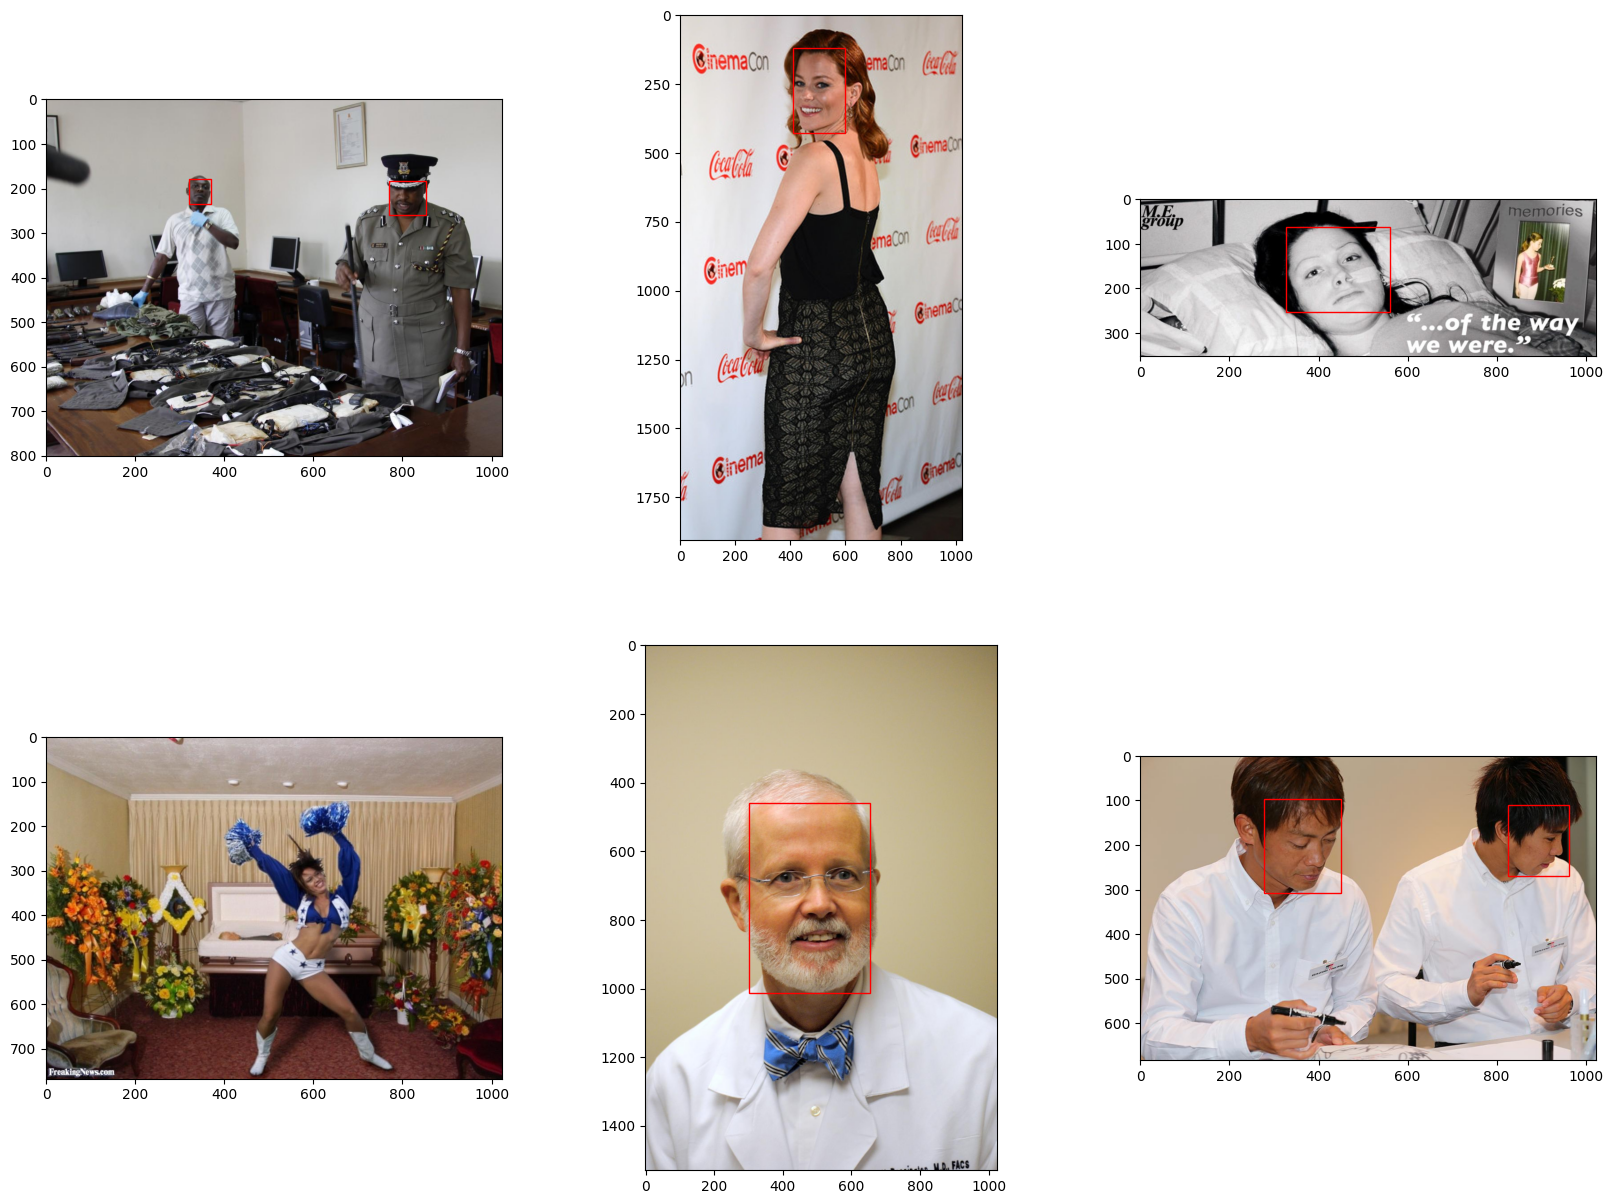

In [7]:
draw_prediction(images, all_boxes)